In [61]:
%pylab inline
import sys
import numpy as np
sys.path.insert(0, '../modules')

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [62]:
from hits import AllHits
hits = AllHits('../data/signal.root')

### Determine the maximum and minimum signal hit times

### Plot the distributions

In [63]:
# Define distribution of all signal wire P_t
pt_sig = np.zeros(0)

n_evts_used = hits.n_events

# Define event-wise average and event-wise spread of signal pt
pt_avg = np.zeros(n_evts_used)
pt_std = np.zeros(n_evts_used)
# Define the number of signal wires if needed later
n_sig = np.zeros(n_evts_used)

for evt in range(n_evts_used):
    # Get px, py
    px = hits.get_measurement(evt, "CdcCell_px") 
    py = hits.get_measurement(evt, "CdcCell_py") 
    # Get hypotenus of px,py, i.e. pt
    pt = np.hypot(px,py)
    # Get the signal wires for the event, hence get the pt on the signal wires
    sig_wires = hits.get_sig_wires(evt)
    pt_sig_wires = pt[sig_wires]
    # Add this to the running distribution
    pt_sig = np.append(pt_sig, pt_sig_wires)
    # Add the corresponding values to each distribution
    pt_avg[evt] = np.average(pt_sig_wires)
    pt_std[evt] = np.std(pt_sig_wires)
    n_sig[evt] = len(sig_wires)

In [64]:
# Convert this value to a radius in CM
# Note that GeV/(Coulomb * Tesla * c) = 334.544900799 cm
pt_to_cm = 334.544900799
rho_sig = pt_to_cm * pt_sig
rho_avg = pt_to_cm * pt_avg
rho_std = pt_to_cm * pt_std

### Comparing difference between neighboring signal wires and arbitrary signal wires 

In [65]:
print "Average number of signal wires {}".format(np.average(n_sig))
print "Average rho of signal wires {}".format(np.average(rho_sig))
print "Standard Deviation of rho of signal wires {} \n".format(np.std(rho_sig))

print "Average rho of signal tracks {}".format(np.average(rho_avg))
print "Standard Deviation of rho of signal tracks {}".format(np.std(rho_avg))

Average number of signal wires 85.6270386706
Average rho of signal wires 31.6936556973
Standard Deviation of rho of signal wires 4.19201648966 

Average rho of signal tracks 30.726741111
Standard Deviation of rho of signal tracks 3.9116923888


### Distibution of signal hits timing with resepct to trigger timing

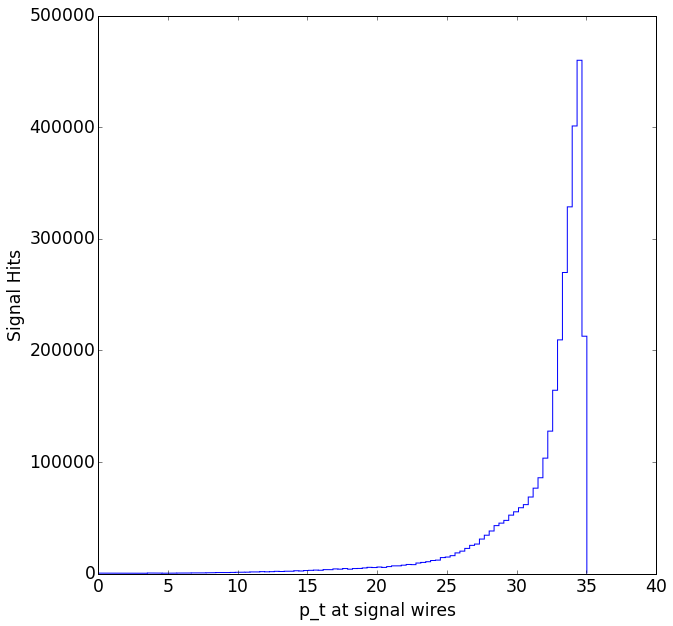

35.0317328511


In [66]:
figsize(10,10)
plt.xticks(fontsize ='xx-large')
plt.yticks(fontsize ='xx-large')
plt.xlabel('p_t at signal wires' , fontsize='xx-large')
plt.ylabel('Signal Hits', fontsize='xx-large')
plt.hist(rho_sig,bins=100,histtype='step')
show()
print max(rho_sig)

In [79]:
def fit(this_x, *p):
    A, mu, sigma, r_max, r_min = p
    if (this_x > r_max) | (this_x < r_min):
        return 0
    if this_x < mu:
        return A*0.05 + A*numpy.exp(-(this_x-mu)**2/(2.*sigma**2))
    if this_x > mu:
        return A*(1.05 - (this_x-mu)/(r_max - mu + 0.1))
avg_rho_hist, edges = np.histogram(rho_avg, bins=150)
bin_centres = (edges[:-1] + edges[1:])/2
hist_fit = [fit(i,  0.205, 33.6, 3., 35., 24.) for i in bin_centres]
hist_fit_2 = [fit(i,  0.205, 34, 2., 34.5, 31.5) for i in bin_centres] 

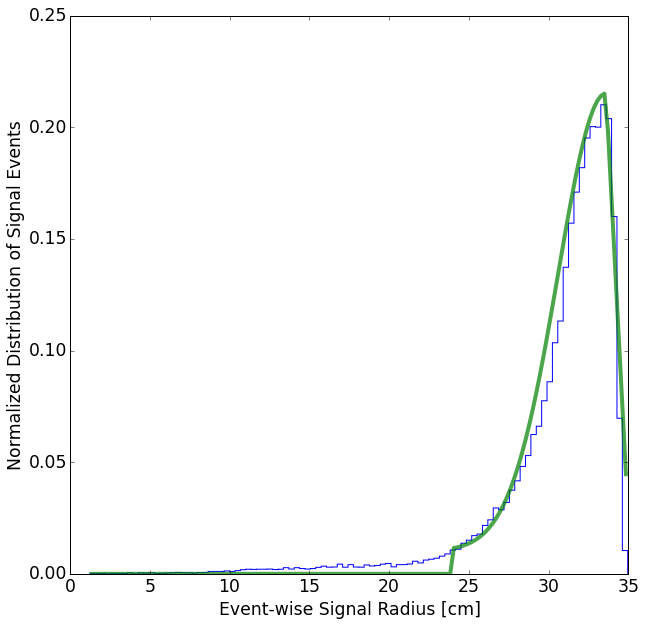

In [84]:
figsize(10,10)
plt.xticks(fontsize ='xx-large')
plt.yticks(fontsize ='xx-large') 
plt.xlabel('Event-wise Signal Radius [cm]' , fontsize='xx-large')
plt.ylabel('Normalized Distribution of Signal Events', fontsize='xx-large')
plt.hist(rho_avg,bins=100,histtype='step', normed=True)
plt.plot(bin_centres, hist_fit, label='Fitted data', lw=4, alpha=0.7)
#plt.plot(bin_centres, hist_fit_2, label='Fitted data', lw=4, alpha=0.5, c="red")

show()

### Reflect Gaussian

In [69]:
from scipy.optimize import curve_fit
import pylab as py
import matplotlib.pyplot as plt
from scipy import optimize


n_new_bins = (bin_max+1)*2
d_bin = float(edges[bin_max +1] - edges[bin_max])
new_edges = np.array([edges[0] + d_bin*i for i in range(n_new_bins+1)])

clipped_array = avg_rho_hist[:bin_max+1]
reversed_avg_rho = clipped_array[::-1]
new_array = np.append(clipped_array, reversed_avg_rho)

Fitted Max =  1778.67877249
Fitted mean =  33.6114365966
Fitted standard deviation =  3.00422269017


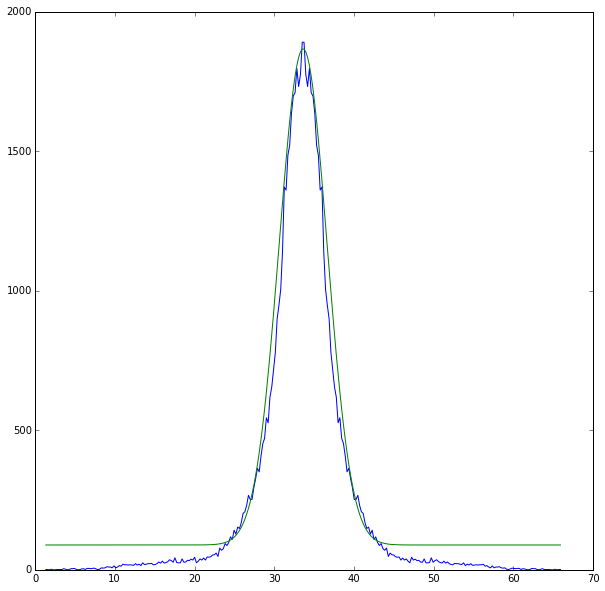

In [70]:
import numpy
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

hist, bin_edges = new_array, new_edges
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

# Define model function to be used to fit to the data above:
def gauss(x, *p):
    A, mu, sigma = p
    return A*numpy.exp(-(x-mu)**2/(2.*sigma**2))

# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
p0 = [0.21, 33.6,4]

coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0)

# Get the fitted curve
hist_fit = gauss(bin_centres, *coeff)
hist_fit[:] +=  coeff[0]*0.05

plt.plot(bin_centres, hist, label='Test data')
plt.plot(bin_centres, hist_fit, label='Fitted data')

# Finally, lets get the fitting parameters, i.e. the mean and standard deviation:
print 'Fitted Max = ', coeff[0]
print 'Fitted mean = ', coeff[1]
print 'Fitted standard deviation = ', coeff[2]

plt.plot([33.6, 33.6], [0, 0.25], 'k-', lw=2,c='green')
plt.plot([33.6-coeff[2], 33.6-coeff[2]], [0, 0.25], 'k-', lw=2,c='orange')
plt.plot([24, 24], [0, 0.25], 'k-', lw=2,c='red')
plt.show()


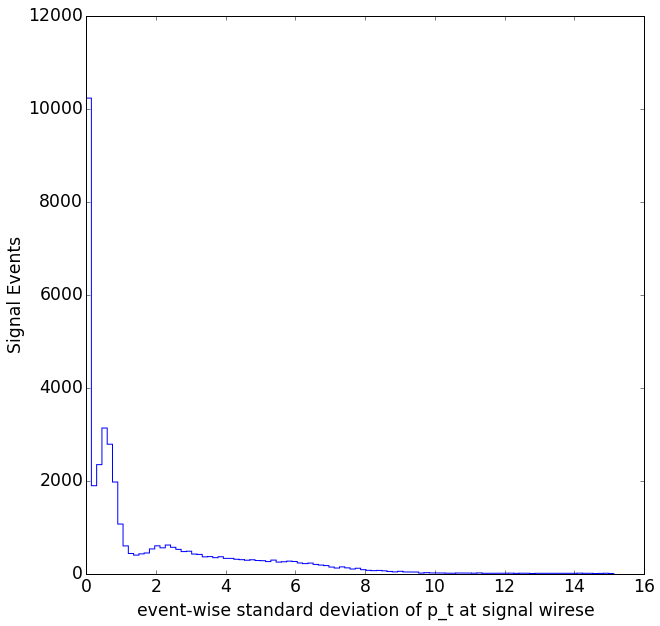

In [71]:
figsize(10,10)
plt.xticks(fontsize ='xx-large')
plt.yticks(fontsize ='xx-large') 
plt.xlabel('event-wise standard deviation of p_t at signal wirese' , fontsize='xx-large')
plt.ylabel('Signal Events', fontsize='xx-large')
plt.hist(rho_std,bins=100,histtype='step')
show()

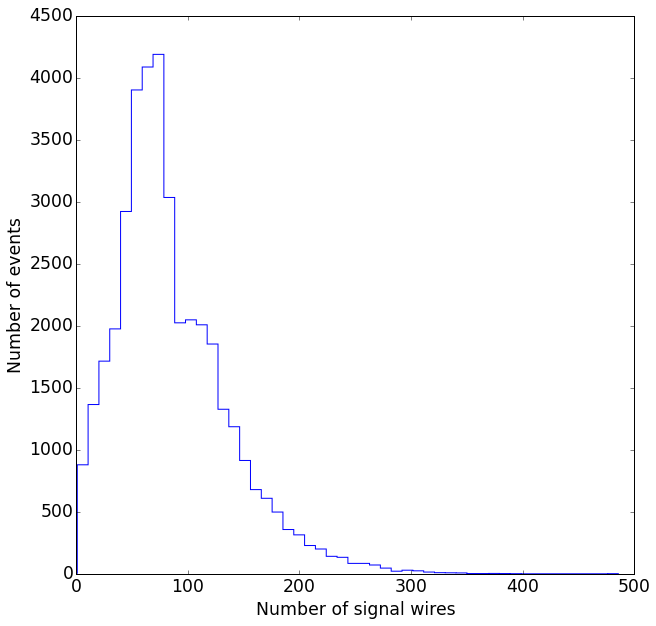

In [72]:
figsize(10,10)
plt.xticks(fontsize ='xx-large')
plt.yticks(fontsize ='xx-large') 
plt.xlabel('Number of signal wires' , fontsize='xx-large')
plt.ylabel('Number of events', fontsize='xx-large')
plt.hist(n_sig,bins=50,histtype='step')
show()

### Check P_t for events with many signal hits

In [73]:
first_wire = 0
last_wire = 0
thresh = 200

pt_sig_new = np.zeros(0)
for evt in range(n_evts_used):
    first_wire = last_wire
    last_wire += n_sig[evt]
    if n_sig[evt] > thresh:
        pt_sig_new = np.append(pt_sig_new, pt_sig[first_wire:last_wire])

In [74]:
rho_sig_new = pt_to_cm*pt_sig_new

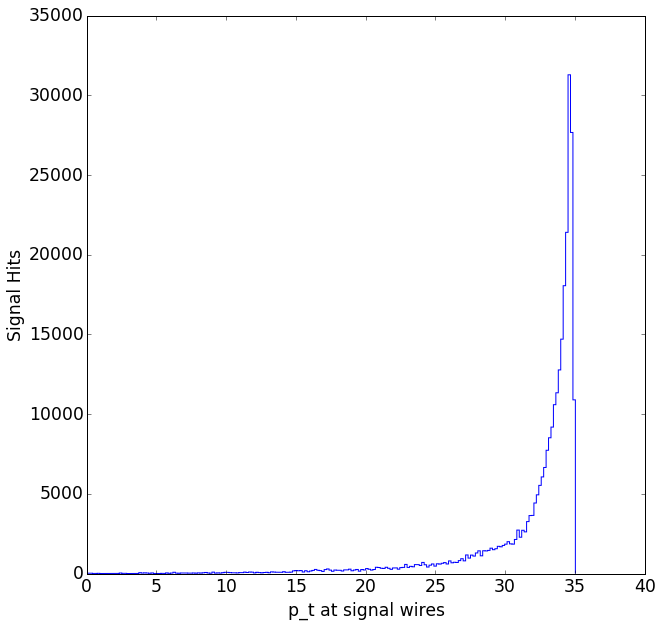

32.0061225378


In [75]:
figsize(10,10)
plt.xticks(fontsize ='xx-large')
plt.yticks(fontsize ='xx-large')
plt.xlabel('p_t at signal wires' , fontsize='xx-large')
plt.ylabel('Signal Hits', fontsize='xx-large')
plt.hist(rho_sig_new,bins=200,histtype='step')
show()
print np.average(rho_sig_new)